# Python 기초정리

## dir, help

In [3]:
# 워킹 디렉토리 확인 
import os
os.getcwd()

'D:\\학습'

In [4]:
# 메모리 리셋
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [8]:
import pandas as pd
# 객체 속성 및 메소드 정보 확인
# dir(pd)
# help(int)

In [9]:
# 도움말 찾기
a = 'string' # a라는 변수에 string을 입력
dir(a) # a라는(문자열) 변수에 쓸 수 있는 method 조회
help(a.upper) # a 변수에 upper method 설명

Help on built-in function upper:

upper() method of builtins.str instance
    Return a copy of the string converted to uppercase.



# 기본 분석 환경 세팅

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# print를 하지 않아도 행을 모두 보여줌
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Columns를 생략 없이 모두 보여줌
from IPython.display import display
pd.options.display.max_columns = None

In [11]:
# 한글 표기
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothc')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

# 파일읽기

## CSV, TSV, TXT : pandas read_csv

In [13]:
# csv read
pd.read_csv('경로/파일이름.csv', encoding = 'cp949') 
## Parameters
# header = True  : 변수명 있을 시 불러옴
# names = [ , , , , ] : 변수명 직접 추가
# encoding : utf-8, cp949, euc-kr
# sep = ','
# 경우에 따라 engine = 'python'
# skipinitialspace = True : 구분자 양쪽 공백 제거

# tsv read
pd.read_csv("train.tsv", delimiter='\t')

# csv write
df.to_csv('./data/df.csv', header = True, index = False, encoding = 'cp949')

## read_csv 안 먹히는 경우! Open으로 열어보기

- 02_File_Open_Practice 참고

## xlsx : pandas read_excel

In [15]:
# xlsx read
pd.read_excel('파일이름.xlsx', sheet_name = 'Sheet1', header = 0)

#xlsx write
df.to_excel('파일이름.xlsx', sheet_name = 'Sheet1')

## 확장자가 h5인 파일 열기 : 시계열 데이터일 수 있음

In [ ]:
#read_hdf
pd.read_hdf('파일이름.h5', key='기준컬럼').set_index('날짜형식_컬럼').sort_index()

## 기본 Open

In [ ]:
# 읽기
f = open('ABBA.txt','r')
data = f.read()
f.close()

# 쓰기
f = open('ABBA-copy.txt','w')
f.write(data)
f.close()

## Pickle 활용

In [ ]:
import pickle
# Dump(저장)

data = ['a','b','c']
with open('list.txt', 'wb') as f:
    pickle.dump(data, f)
    
    
# Load(불러오기)
with open('list.txt', 'rb') as f:
    data = pickle.load(f) # 단 한줄씩 읽어옴
    
data

## numpy

### 생성

In [ ]:
import numpy as np
# array 생성 
a = np.array([1,2,3,4]); print('a',a)

# array 생성의 여러 예
b = np.zeros((3,3)) ; print('b', b)
c = np.ones((3,4)) ; print('c', c)
d = np.full((2,2),7) ; print('d',d) # 특별 값으로 채우기
e = np.eye(3,3) ; print('e',e) # 단위행렬
f = np.random.random((2,2)) ; print('f',f) # 랜덤
g = np.arange(5); print('g', g)

### reshape

In [38]:
import numpy as np

a = np.array([[1,2,3],[4,5,6]]) ; print('a',a) # array 생성
a = a.reshape(3, 2) ; print('a', a) # reshape
a = a.reshape(6,-1) ; print('a', a)

a [[1 2 3]
 [4 5 6]]
a [[1 2]
 [3 4]
 [5 6]]
a [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


### slice

In [ ]:
print( d[0,:] ) # 정수 슬라이싱 --> 배열 차원 감소
print( d[0:1,:] ) # 그냥 슬라이싱 --> 배열 차원 유지
d.copy() # 배열 복사

### 숫자 다루기

In [5]:
import math
a = np.array([math.e,2,3]) # math.e 는 자연상수
np.abs(a) # 절대값
np.sqrt(a) # 제곱근
np.log(a) # 로그
np.floor(a) # 내림
np.ceil(a) # 올림
np.rint(a) # 반올림

array([3., 2., 3.])

## Pandas DataFrame

### DataFrame 생성

In [9]:
import pandas as pd

# Dataframe 만드는 법
# np.nan으로 NaN 값도 넣을 수 있음

data = {'name':['Jason','Molly',np.nan,'Jake','Amy'],
       'year':[2012,2012,2013,2014,2014],
       'reports':[4,24,31,2,3]}


In [10]:
data

{'name': ['Jason', 'Molly', nan, 'Jake', 'Amy'],
 'year': [2012, 2012, 2013, 2014, 2014],
 'reports': [4, 24, 31, 2, 3]}

In [11]:
df = pd.DataFrame(data, index = ['Cochice','Pima','Santa Cruz','Narucioa','Yuma'])
df

,name,year,reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,NaN,2013,31
Narucioa,Jake,2014,2
Yuma,Amy,2014,3


### DataFrame 컬럼명 변경

In [12]:
df = df.rename(columns = {'name':'New Name'})

In [14]:
# 전체 컬럼 이름 바꾸기

new_name_list = ['Name','Year','Reports']

df.columns = new_name_list

## Data 확인하기

### DataFrame

In [ ]:
# df 
df.head()
df.tail()
df.shape
df.columns
df.dtypes 
df.info()
df.describe()  /  df.describe(include='object')
type()

### Dict, array

In [ ]:
# dictionary 
d.keys()
d.values()
d.items()
# array 
a.shape
a.dtype

## 결측치 처리

In [ ]:
# na 처리 : dropna(), fillna()
df.dropna() # nan이 하나라도 들어간 행은 삭제
df.dropna(how = 'all') # 데이터가 모두 nan인 행만 삭제 / 초기값:'any'
## Parameters
# axis = 'index' / 'columns'
# subset = ['col1', 'col2', ...] # 적용 대상 컬럼 특정

df.fillna(0) # na를 0으로 채우기

new_data = {'a':0, 'b':1, 'c':-999}
df.fillna(new_data) # na 발생 시 a 열에는 0, b 열에는 1, c 열에는 -999로 채움
df.fillna(new_data, limit = 2) # 각 열별로 2개의 nan까지 대체
df.fillna(method = 'ffill') # 열 별로 바로 앞의 데이터로 채움
df.fillna(method = 'bfill') # 열 별로 바로 뒤의 데이터로 채움
# ffill의 경우 첫 행이거나, 앞의 데이터가 nan일 경우 nan유지. bfill도 반대로 동일

# 평균값, 중앙값으로 대치
df.loc[19,'Leaflets'] = df['Leaflets'].mean() # 평균값으로 
df.loc[19,'Leaflets'] = df['Leaflets'].median # 중앙값으로

## 중복제거

In [15]:
df

,Name,Year,Reports
Cochice,Jason,2012,4
Pima,Molly,2012,24
Santa Cruz,NaN,2013,31
Narucioa,Jake,2014,2
Yuma,Amy,2014,3


In [ ]:
# DataFrame 중복 row 제거
df.duplicated() # 중복 여부 boolean 형태로 반환
df.drop_duplicates() # 행 내용이 동일한 경우 제거
df.drop_duplicates(['col1'], keep='last') # col1기준 중복값중 마지막만 남겨둠

## 이상치 처리

In [60]:
ti = pd.read_csv('data/titanic_simple.csv')

In [61]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


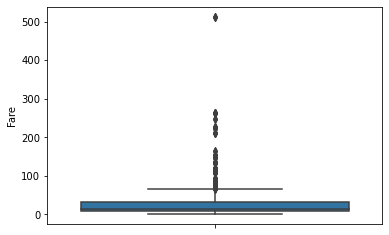

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y = 'Fare', data = ti, orient = 'h')
plt.show();

In [63]:
q1 = ti['Fare'].quantile(.25)
q3 = ti['Fare'].quantile(.75)
iqr = q3 - q1
min_iqr = q1 - 1.5 * iqr
max_iqr = q3 + 1.5 * iqr
min_from_all = ti['Fare'].min()
max_from_all = ti['Fare'].max()
if (min_iqr < min_from_all) :
    min_iqr = min_from_all
if (max_iqr > max_from_all) :
    max_iqr = max_from_all
    
ti[(ti['Fare'] < min_iqr ) | (ti['Fare'] > max_iqr)] # 이상치 조회

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,263.0000,Southhampton
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,146.5208,Cherbourg
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,82.1708,Cherbourg
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,76.7292,Cherbourg
...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,69.5500,Southhampton
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,89.1042,Cherbourg
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,164.8667,Southhampton
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,69.5500,Southhampton


In [65]:
ti.loc[(ti['Fare'] < min_iqr ),'Fare'] = min_iqr # 이상치 보정 - 하한치로 보정
ti.loc[(ti['Fare'] > max_iqr ),'Fare'] = max_iqr # 이상치 보정 - 상한치로 보정

## 데이터 조회하기

In [ ]:
# 열 조회
df['칼럼명']
# 다수 열 조회
df[['gpa', 'gre']].head()
# 고유값 조회
df['admit'].unique()

# 행기준 : iloc 사용
df.iloc[:,2]
# 행번호 1~2 조회
df.iloc[1:3]


# loc 사용
df.loc[:,'name']
# loc + 조건
df.loc[df['name']=='Tina',['year','reports']]


#조건으로 
df[(df['칼럼']> 3.0) & (df['칼럼'] == 3)] 
df[sales['칼럼'] == 2016].groupby('Month')['Amt'].sum()

## 문자를 변수명으로 사용하기

In [103]:
# 중요 - For loop에 쓸 수 있는 좋은 함수
# var()은 문자열에 변수를 담을 때 사용하고,
# locals()는 문자열을 변수로 인식하여 method를 사용할 수 있다.

vars()['df_{}_{}'.format('titanic', 'simple')] = pd.read_csv('data/{}_{}.csv'.format('titanic', 'simple'))
# 'df_19_4'라는 문자열을 df_19_4라는 변수로 만들고, 여기에 19(4).xlsx를 담음

df1 = 'df_titanic_simple'
locals()[df1].columns
# 'df_19_4'라는 문자열을 변수화하고, columns method를 조회

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

## Dataframe 정렬, 인덱싱

In [ ]:
# 인덱스 기준 정렬
df.sort_index(axis = 0)
# 값 기준 정렬
df.sort_values(by=['admit', 'gpa'], ascending=[False, True])
# 값 count
df['A'].value_counts()
# 값 포함여부확인
df['A'].isin(['alpha', 'beta']) # alpha 또는 beta가 있으면 True

In [ ]:
# 인덱스 -> 컬럼
df.reset_index()
# 컬럼 -> 인덱스
df.set_index('column_name')

## MultiIndex 다중 인덱스

In [137]:
# 다중 인덱스
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C1", "C2", "C1", "C2"]])
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

## MultiIndex를 단일 인덱스로 만드는 방법

In [123]:
# 인덱스(행방향)가 다중일 때 : reset_index()를 사용한다 -- 끝
# 컬럼명(열방향)이 다중일 때
level0 = df3.columns.get_level_values(0)
level1 = df3.columns.get_level_values(1)
df3.columns = level0 + '_' + level1
df3

,A_C1,A_C2,B_C1,B_C2
0,1.76,0.40,0.98,2.24
1,1.87,-0.98,0.95,-0.15
2,-0.10,0.41,0.14,1.45
3,0.76,0.12,0.44,0.33
4,1.49,-0.21,0.31,-0.85


## (컬럼명) MultiIndx 이름 붙이기 / 조회

In [150]:
# 다중인덱스에 이름 붙이기
df3.columns.names = ["Cidx1","Cidx2"]
print(df3)
print('\n')
# 상위 레벨에서 조회
print(df3[("B", "C1")])
print(df3.loc[0, ("B", "C1")])
print('\n')

# iloc는 가장 하위 레벨에서 조회함
print(df3.iloc[0,2]) # 0.98

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85


0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64
0.98


0.98


## (인덱스) MultiIndex 이름 붙이기

In [1]:
import pandas as pd
import numpy as np

# 다중 행 인덱스 + 이름 붙이기
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns=[["A", "A", "B", "B"],
                            ["C", "D", "C", "D"]],
                   index=[["M", "M", "M", "F", "F", "F"],
                          ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

## 인덱스 순서 교체

In [156]:
# 다중 인덱스의 인덱스 순서(레벨) 교체 
# swaplevel(i, j, axis)
df5 = df4.swaplevel("Ridx1", "Ridx2", 0) ; 
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74

## 인덱스 정렬

In [159]:
# 다중 인덱스의 정렬
df5.sort_index(axis=1, level=0)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74

In [163]:
# 다중 인덱스의 정렬
df5.sort_index(axis=0, level=1)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45

## Stack, Unstack

In [ ]:
# 행 인덱스 -> 열 인덱스 : stack()
df4.stack() # 가장 안쪽 인덱스가 stack 됨
df4.stack("Cidx1") # 특정 인덱스를 stack
df4.stack(1) # 번호로 특정(바깥부터 0, 1... -1)

# 열 인덱스 -> 행 인덱스 : unstack()
df4.unstack() # 가장 안쪽 인덱스가 unstack 됨
df4.unstack("Ridx2") # 특정 인덱스를 unstack
df4.unstack(0) # 번호로 특정(바깥부터 0, 1... -1)

In [3]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [13]:
df4.unstack()

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

In [11]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

## 날짜데이터 다루기

### String -> Datetime

In [ ]:
# string -> datetime
# 첫 번째 방법 : pd.to_datetime 이게 안 되면 너의 분석은 일단 50% 망한 거임
df['Date'] = pd.to_datetime(df['Date'])
pd.to_datetime('2.1.2011') # 2011년 2월 1일
pd.to_datetime(dt, format='%d.%m.%Y') # 2011년 1월 2일
pd.to_datetime('2.1.2011', dayfirst=True) # 2011년 1월 2일

In [31]:
# 두 번째 방법
import datetime
date_time_str = 'Jun 28 2018  7:40AM'  
date_time_obj = datetime.datetime.strptime(date_time_str, '%b %d %Y %I:%M%p')
# 2018-09-15 00:01:14
# %Y-%m-%d %H:%M:%S
print('Date:', date_time_obj.date())  
print('Time:', date_time_obj.time())  
print('Date-time:', date_time_obj) 


Date: 2018-06-28
Time: 07:40:00
Date-time: 2018-06-28 07:40:00


##### 날짜 및 시간 지정 문자열 의미

- %Y 앞의 빈자리를 0으로 채우는 4자리 연도 숫자 (소문자는 두 자리인 듯)
- %m 앞의 빈자리를 0으로 채우는 2자리 월 숫자
- %d 앞의 빈자리를 0으로 채우는 2자리 일 숫자
- %H 앞의 빈자리를 0으로 채우는 24시간 형식 2자리 시간 숫자
- %M 앞의 빈자리를 0으로 채우는 2자리 분 숫자
- %S 앞의 빈자리를 0으로 채우는 2자리 초 숫자
- %A 영어로 된 요일 문자열 (소문자는 약어일 듯)
- %B 영어로 된 월 문자열 (얘도 아마 소문자는 약어일 듯)

### Timestamp -> Datetime

In [32]:
# timestamp -> datetime
from datetime import datetime
import time
tt = time.time() # 현재시각
#time.time()이 timestamp 형태 : 1599989445.0296414

datetime.fromtimestamp(tt) # datetime 형식으로 변환
# 2020-09-13 18:28:49.321784

datetime.datetime(2022, 7, 5, 11, 11, 32, 972157)

In [33]:
# Timestamp 직접 만들기
# 초 * 분 * 시 * 일
timestamp = 60 * 60 * 24 * 30 # 2592000
datetime.fromtimestamp(timestamp)

datetime.datetime(1970, 1, 31, 9, 0)

## Datetime 내용 조회 : 연, 월, 일 등

In [ ]:
# datetime
# Type이 날짜 형식인 경우
a.month # 월 추출
a.dt.day_name() # 요일

## 데이터타입 변경하기

In [ ]:
# Pandas에서 데이터프레임 dtype 변경하기
df['A'].astype('float')
df['B'].astype('int')
pd.to_numeric(df['C'])
pd.to_numeric(pd.Series(['1','2','a']), errors='ignore') # 'a'가 그대로 반환됨
pd.to_numeric(pd.Series(['1','2','a']), errors='coerce') # 'a'가 nan으로 반환됨

df['C'].astype('str')

pd.Categorical(df['D'])
order = ['봄','여름','가을','겨울']
pd.Categorical(df['D'], categories = order, ordered = True) # Category의 종류와 순서를 정해줄 수 있음

# Datetime으로의 변환은 Pandas Cookbook 참고

## apply, map

In [ ]:
# apply, map 함수

# map은 Dataframe Series의 값 하나하나에 함수를 적용할 때 사용
df['B']  = df['A'].map(lambda x : my_func(x)) # x는 df['A']의 값

# apply는 Datafram 각 행의 여러 컬럼에 함수를 적용할 때 사용
df['C'] = df.apply(lambda x: my_func(x['A'], x['B']), axis=1)
# x는 df의 각 행, A, B는 컬럼

## String ↔ List

In [34]:
# str to list
string = "apple is a fruit"
sen = string.split()
print(sen)

['apple', 'is', 'a', 'fruit']


In [35]:
# list to str
string = ' '.join(sen)
print(string)

apple is a fruit


## 시각화 결과 저장

In [ ]:
# 그래프 저장
fig.savefig('filename.png', format='png') # 차트 저장
## Parameters
# dpi = 300 : 해상도

## 숫자 표기법

In [ ]:
# Pandas 숫자 출력 포맷팅
# https://financedata.github.io/posts/pandas-display-format.html

# 과학적 표기법(Scientific notation)을 사용하지 않는 경우
pd.set_option('display.float_format', '{:.2f}'.format)

# 과학적 표기법(Scientific notation)
pd.set_option('display.float_format', '{:.2e}'.format)
pd.set_option('display.float_format', '${:.2g}'.format) # 적당히 알아서
pd.set_option('display.float_format', None) # 원상복귀

## DataFrame 합치기

### merge

In [ ]:
# df 옆으로 합치기
# merge on index
pd.merge(df1, df2, how='outer', left_index=True, right_index=True)

# merge on cols : cols를 key로 사용
pd.merge(df1, df2, how = 'outer', on = ['col1', 'col2']) # 합집합 / 'left'는 left join

### concat

In [ ]:
# 옆으로 단순 합치기
df_new = pd.concat([df, df_rank], axis=1)

# df 밑으로 합치기
s1 = pd.Series([0,1], index=['a','b'])
s2 = pd.Series([2,3,4], index=['c','d','e'])
s3 = pd.Series([5,6], index=['f','g'])

pd.concat([s1,s2,s3]) # 단순히 index와 Series가 연결됨

# 컬럼을 구준하며 연결 : index는 유지하며 DataFrame 형태로 결과
pd.concat([s1,s2,s3], axis=1, keys=['col1','col2','col3'], sort=False)
pd.concat([df3, df4], axis=1) # df 열방향 병합
pd.concat([df3, df4], ignore_index=True) # df 행방향 병합, index를 새로 매김

## Dummy화

In [ ]:
# dummy 변수 만들고 합치기
df_rank = pd.get_dummies(df['col3']) # dummy
df_new = pd.concat([df, df_rank], axis=1) # 합치기
df_new.drop(['col3'], axis=1, inplace=True) # drop
df_new

## Rolling, Shift

In [ ]:
# rolling
df['col2'] = df['col1'].rolling(3).mean() # col1의 과거 3개 값의 평균
df['col2'] = df['col1'].rolling(3, min_periods = 1).mean() # min_periods : 1, 2행을 과거 1, 2행 값만으로 계산

df['col3'] = df['col2'].shift(3) # 'col2'의 값을 3칸 아래로 이동

## 딕셔너리

In [37]:
# 딕셔너리 생성
dic1 = {'a':50, 'b':100, 'c':200}
dic2 = {'c0':'hey', 'd':'apple', 'e':'wassup'}

# 다른 방법
dict(a = 50, b = 100, c = 200)

{'a': 50, 'b': 100, 'c': 200}

In [38]:
# 딕셔너리 item 추가
dic1[5] = 600 # 여기서 5는 순서가 아니라 그냥 문자열처럼 키값임
dic1

{'a': 50, 'b': 100, 'c': 200, 5: 600}

In [39]:
# 딕셔너리 item 삭제
del dic1['a']
dic1

{'b': 100, 'c': 200, 5: 600}

In [40]:
# 딕셔너리 병합
dic1.update(dic2)
dic1

{'b': 100, 'c': 200, 5: 600, 'c0': 'hey', 'd': 'apple', 'e': 'wassup'}

## Set

In [41]:
# Set : 중첩되지 않은 값
e = {'apple', 'banana', 'orange'} ; print(e)
e.add('peach') ; print(e) # 요소 추가
e.remove('apple') ; print(e) # 요소 제거

{'apple', 'banana', 'orange'}
{'apple', 'peach', 'banana', 'orange'}
{'peach', 'banana', 'orange'}


## List

In [ ]:
a = [1, 2, 3]
a.append(5) # [1, 2, 3, 5]
a.insert(0, 4) # [4, 1, 2, 3, 5]
a.sort() # [1, 2, 3, 4, 5]
a.reverse() # [5, 4, 3, 2, 1]
a.insert(1, 'lemon') # [5, 'lemon', 4, 3, 2, 1]
a.index('lemon') # 위치 출력 -> 1 
a.remove(1) # 해당 원소 삭제 -> [5, 'Lemon', 4, 3, 2]
a.pop() # 마지막 원소 출력 후, 해당 원소는 삭제 -> 1 // [5, 'Lemon', 4, 3]
a.count('Lemon') # 개수 세기 -> 1
a.extend([9, 8, 'Yeah']) # 뒤로 합침 -> [5, 'Lemon', 4, 3, 9, 8, 'Yeah']
a[0:2] = ['you', 'me'] # 대치 -> ['you', 'me', 4, 3, 9, 8, 'Yeah']

## 문자열

### 문자열 포함/일치 여부 확인

In [ ]:
# 문자열 데이터 탐색
df['col1'].str.contains('Lemon') # 포함 여부
df['col2'].str.match('Lemon') # 일치 여부

In [42]:
# replace : 문자열 변경
a = 'hello lemon'
a.replace('lemon', 'apple')

'hello apple'

In [43]:
# strip : 앞뒤 공백 제거
b = '   corn   '
b.strip()

'corn'

## 기타

### 조건 검색 : loc, query

In [ ]:
# 조건부 검색 : query 사용
df[df['col1']>0.5 & df['col2']==0.3]
df.query('col1>0.5 and col2==0.3') # 같은 표현

### String 자릿수 맞추기

In [45]:
# string 앞에 0으로 자릿수 맞춰주기
'aa'.zfill(5) # '000aa'

a = ['a','bb','ccc','dddd']
df = pd.DataFrame(a)
df[0].map(lambda x: x.zfill(5))

0    0000a
1    000bb
2    00ccc
3    0dddd
Name: 0, dtype: object

### 소수점 자리 제한

In [46]:
# 소수점 자리 제한
'{:.2f}'.format(12.3333)

b = [1.111111, 2.22222, 3.333333]
df = pd.DataFrame(b, columns=['Lemon'])
df['Lemon'].map(lambda x: '{:.2f}'.format(x))

0    1.11
1    2.22
2    3.33
Name: Lemon, dtype: object

### 기초 연산

In [47]:
print(23//4) # 몫
print(23%4) # 나머지
print(3**2) # 제곱

5
3
9


### enumerate

In [ ]:
# enumerate : 순서가 있는 자료형를 입력받아, 인덱스와 값을 포함하는 오브젝트로 리턴.
fruits = ['apple', 'banana', 'cherry']
for index, value in enumerate(fruits):
    print(index, value)

### groupby

In [ ]:
# aggregate
df.groupby('key').aggregate(['min', np.median, max]) # 열별 min, median, max
df.groupby('key').aggregate({'data1': 'min', 'data2': np.sum}) # 열 각각에 대해 다른 요약 적용

# filter
def filter_by_mean(x):
    return x['data2'].mean() > 3
df.groupby('key').filter(filter_by_mean) # 함수 결과 True만 필터링

# apply
df.groupby('key').apply(lambdax: x.max() - x.min()) # 열별 max-min을 apply

# get_group
df.groupby("시도").get_group("충남") # '시도'가 충남인 것만 출력

# pivot table
df.pivot_table(
    index='sex',
    columns='class',
    values=['survived','col4'],
    aggfunc=np.mean)

In [58]:
df = pd.read_csv('data/titanic_simple.csv')
print(df.groupby('Pclass').get_group(3))
print(df.groupby('Sex').aggregate(['min', np.median, max]))

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age     Fare      Embarke

## 정규표현식

\d - 숫자와 매치, [0-9]와 동일한 표현식이다.<br>

\D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.<br>

\s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.<br>

\S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.<br>

\w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.<br>

\W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.<br>